### Problem Statement

For starters let us write an agent to solve a simple optimization problem.
1. Data Generator: Write a piece of code which produces our ground truth data as
y=f(x) where f(x) = −0.2 + 0.4 ∗ x and x should be in the range [-1,1]. Produce a
plot of f(x).
2. Function: The function we’d like to fit is f(x; α, β) = α + β ∗ x Write a piece of
code which produces ŷ = f(x; α, β). Produce a plot for all parameters equal to one.
3. Discretized Space: Let also be α and β be in the range [-1,1]. Their values should
be discretized with stepsize 0.2. Plot this space as squares in a plane where each
discrete pair is denoted by a dot in the middle of one of the squares (should be 64
squares in the end).
4. Rewards: Use the RMSE value at a given point to come up with rewards for this
space, i.e lower RMSE should give more reward then higher RMSE. Add the
Rewards to your plot from 3.
5. Q Learning: Write an agent which is able to walk this discrete space to find the
parameters of the true data generator.

In [0]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def data_generator(input_data):
    """
    Generate ground truth data (y) based on
    y=f(x) where f(x) = −0.2 + 0.4 ∗ x
    """
    return -0.2 + 0.4 * input_data

def fit_function(x, alpha, beta):
    """
    Return predicted value (y_bar)
    """
    return alpha + beta * x

def discrete_parameter_space(input_range, step_size=0.2):
    return np.arange(input_range[0]+step_size, input_range[1], step_size)

def rmse_func(targets, predictions):
    return np.sqrt(np.mean((predictions-targets)**2))

def reward_func(current_input):
    if current_input < 0.1:
        return 20
    elif current_input < 0.3:
        return 10
    elif current_input < 0.5:
        return 5
    else:
        return 0

In [0]:
input_range = (-1, 1)
data_length = 20
input_data = np.linspace(input_range[0], input_range[1], data_length)
ground_truth = data_generator(input_data)

In [63]:
ground_truth

array([-0.6       , -0.55789474, -0.51578947, -0.47368421, -0.43157895,
       -0.38947368, -0.34736842, -0.30526316, -0.26315789, -0.22105263,
       -0.17894737, -0.13684211, -0.09473684, -0.05263158, -0.01052632,
        0.03157895,  0.07368421,  0.11578947,  0.15789474,  0.2       ])

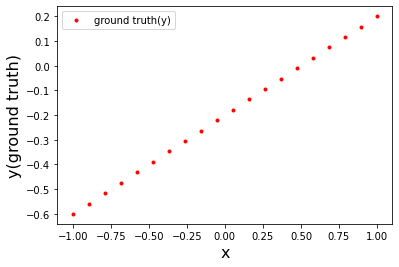

In [64]:
index = np.linspace(input_range[0], input_range[1], data_length)
plt.plot(index, ground_truth, 'r.', label='ground truth(y)') # x
plt.legend(loc="upper left")
plt.xlabel('x', fontsize=16)
plt.ylabel('y(ground truth)', fontsize=16)
plt.show()

In [0]:
alpha = 1
beta = 2
fitted_values = fit_function(input_data, alpha, beta)

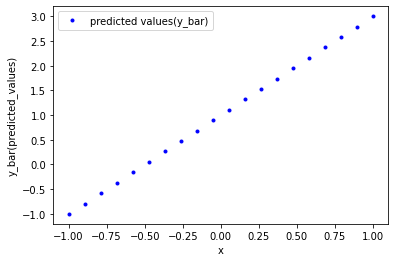

In [66]:
plt.plot(index, fitted_values, 'b.', label='predicted values(y_bar)') # x

plt.legend(loc="upper left")
plt.xlabel('x', fontsize=10)
plt.ylabel('y_bar(predicted_values)', fontsize=10)
plt.show()

In [0]:
discrete_alphas = discrete_parameter_space(input_range)
discrete_betas = discrete_parameter_space(input_range)

In [68]:
discrete_alphas, discrete_betas

(array([-8.00000000e-01, -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,
        -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,  6.00000000e-01,
         8.00000000e-01]),
 array([-8.00000000e-01, -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,
        -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,  6.00000000e-01,
         8.00000000e-01]))

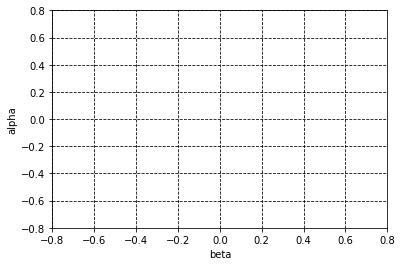

In [69]:
fig, ax = plt.subplots()
ax.set_xlim((-0.8,0.8))
ax.set_ylim((-0.8,0.8))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.grid(b=True, which='major', color='k', linestyle='--')
# fig.savefig('test.png', dpi=600)
# plt.close(fig)
plt.xlabel('beta', fontsize=10)
plt.ylabel('alpha', fontsize=10)
plt.show()

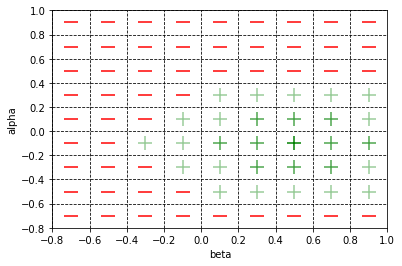

In [77]:
# apply alpha, beta pair from discrete_alphas, discrete_betas to calculate the rewards
reward_matrix = []
positive_reward_20_spaces = []
positive_reward_10_spaces = []
positive_reward_5_spaces = []
negative_reward_spaces = []
for alpha in discrete_alphas:
    reward_row = []
    for beta in discrete_betas:
        predictions = fit_function(input_data, alpha, beta)
        rmse = rmse_func(ground_truth, predictions)
        reward = reward_func(rmse)
        if reward == 20:
            positive_reward_20_spaces.append([beta + 0.1, alpha+0.1])
        elif reward == 10:
            positive_reward_10_spaces.append([beta + 0.1, alpha+0.1])
        elif reward == 5:
            positive_reward_5_spaces.append([beta + 0.1, alpha+0.1])
        else:
            negative_reward_spaces.append([beta + 0.1, alpha+0.1])
        reward_row.append(reward)
    
    reward_matrix.append(reward_row)

fig, ax = plt.subplots()
# + for positive reward and - for negative reward indicators
# using alpha value for giving higher alpha to higher reward place
ax.scatter(*zip(*positive_reward_20_spaces), c='green', marker='+', s=200)
ax.scatter(*zip(*positive_reward_10_spaces), c='green', marker='+', s=200, alpha=0.7)
ax.scatter(*zip(*positive_reward_5_spaces), c='green', marker='+', s=200, alpha=0.4)
ax.scatter(*zip(*negative_reward_spaces), c='red', marker='_', s=200)
ax.set_xlim((-0.8,1))
ax.set_ylim((-0.8,1))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
# ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')
# fig.savefig('test.png', dpi=600)
# plt.close(fig)
plt.xlabel('beta', fontsize=10)
plt.ylabel('alpha', fontsize=10)
plt.show()

In [0]:
# corresponding alpha, beta position starts from (-0.8, -.0.8) as origin
# rewards table
R = np.array(reward_matrix)
# Q table
Q = np.zeros_like(R)


In [0]:
def update_Q_value(state, action, next_state, lr, gamma):
    """
    Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[new_state, :]) — Q[state, action])
    """
    current_R = R[state, action]
    current_Q = Q[state, action]
    new_Q = current_Q + lr * (current_R + gamma * np.max(Q[next_state, :]) - current_Q)
    Q[state, action] = new_Q
    return R[state, action]

def set_initial_state(n_states, random_state):
    states = list(range(n_states))
    random_state.shuffle(states)
    initial_state = states[0]
    return initial_state

def sample_action_space(n_actions, random_state, current_state):
    valid_moves = R[current_state] >= 0
    actions = np.array(list(range(n_actions)))
    actions = actions[valid_moves == True]
    # random_state.shuffle(actions)
    action = np.random.choice(actions)
    # action = actions[0]
    return action


In [74]:
'''
Q learning steps:

1. Initialize the Q-table with zeros.
2. Start exploring /exploiting actions: For each state, select any one among all possible actions for the current state (S).
3. Travel to the next state (S') as a result of that action (a).
4. For all possible actions from the state (S') select the one with the highest Q-value.
5. Update Q-table values using the equation.
6. Set the next state as the current state.
7. If goal state is reached, then end and repeat the process.

'''
# set hyperparameters
gamma = 0.8 # discount factor 
lr = 0.9 # learning rate
n_episodes = 10
states = 9
actions = 9
epsilon = 0.05
# random_state = np.random.RandomState(10)
for e in range(n_episodes):
    # current_state = set_initial_state(states, random_state)
    current_state = np.random.randint(0,states)
    print('current initial state', current_state)
    complete = False
    while not complete:
        if random.uniform(0, 1) < epsilon:
        # if random_state.rand() < epsilon:
            # we explore the action space
            action = sample_action_space(actions, random_state, current_state)
        else:
            # exploit the knowledge
            action = np.argmax(Q[current_state])
        print('action is', action)
        
        next_state = action
        
        reward = update_Q_value(current_state, action, next_state, lr, gamma)
        if reward > 10:
            complete = True
            print('one path completed')
        
        current_state = next_state
        print('current state inside loop', current_state)

# solution_x = 
# print('the solution is', )

current initial state 8
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
current state inside loop 0
action is 0
curr

In [75]:
Q

array([[ 0,  0, 22,  0,  0, 15,  0,  9,  9],
       [15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0, 29,  0, 17, 14],
       [ 9,  7,  0,  0,  0,  0, 31, 19,  0],
       [11,  9, 18, 18,  0,  0, 21,  0, 15],
       [10,  0,  0, 24, 21,  0,  4, 13, 12],
       [15,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  0,  0,  9,  0]])

# COMMENT : since final state is '6', we have to reverse lookup the table above for the corresponding alpha and beta values

## We saw that alpha = -0.2 and beta = 0.4

In [80]:
# verification
alpha = -0.2
beta = 0.4
predictions = fit_function(input_data, alpha, beta)
rmse = rmse_func(ground_truth, predictions)
reward = reward_func(rmse)
reward

20